In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("city_temperature.csv", low_memory=False)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [11]:
print(df.columns)

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')


In [15]:
scaler = StandardScaler()
df['AvgTemperature'] = scaler.fit_transform(df[['AvgTemperature']])
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,0.255111
1,Africa,Algeria,NaN,Algiers,1,2,1995,-0.205610
2,Africa,Algeria,NaN,Algiers,1,3,1995,-0.224288
3,Africa,Algeria,NaN,Algiers,1,4,1995,-0.298999
4,Africa,Algeria,NaN,Algiers,1,5,1995,-0.252304
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,0.821673
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,0.796769
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,0.877706
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,0.865254


In [17]:
def create_sequences(data, timesteps):
    sequences = []
    labels = []
    for i in range(len(data) - timesteps):
        sequences.append(data[i:i+timesteps])
        labels.append(data[i+timesteps])
    return np.array(sequences), np.array(labels)


In [19]:
timesteps = 10
sequences, labels = create_sequences(df['AvgTemperature'].values, timesteps)

train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

model = Sequential([
    SimpleRNN(32, input_shape=(X_train.shape[1], 1)), 
    Dense(1)  
])

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
model.fit(X_train, y_train, epochs=20, batch_size=32)

y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 108s 1ms/step - loss: 0.3488
Epoch 2/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 109s 2ms/step - loss: 0.3370
Epoch 3/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 104s 1ms/step - loss: 0.3376
Epoch 4/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 114s 2ms/step - loss: 0.3353
Epoch 5/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 118s 2ms/step - loss: 0.3381
Epoch 6/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 116s 2ms/step - loss: 0.3351
Epoch 7/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 115s 2ms/step - loss: 0.3356
Epoch 8/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 117s 2ms/step - loss: 0.3387
Epoch 9/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 369s 5ms/step - loss: 0.3349
Epoch 10/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 121s 2ms/step - loss: 0.3367
Epoch 11/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 117s 2ms/step - loss: 0.3347
Epoch 12/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 113s 2ms/step - loss: 0.3366
Epoch 13/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 113s 2ms/step - loss: 0.3372
Epoch 14/20
72658/72658 ━━━━━━━━━━━━━━━━━━━━ 12

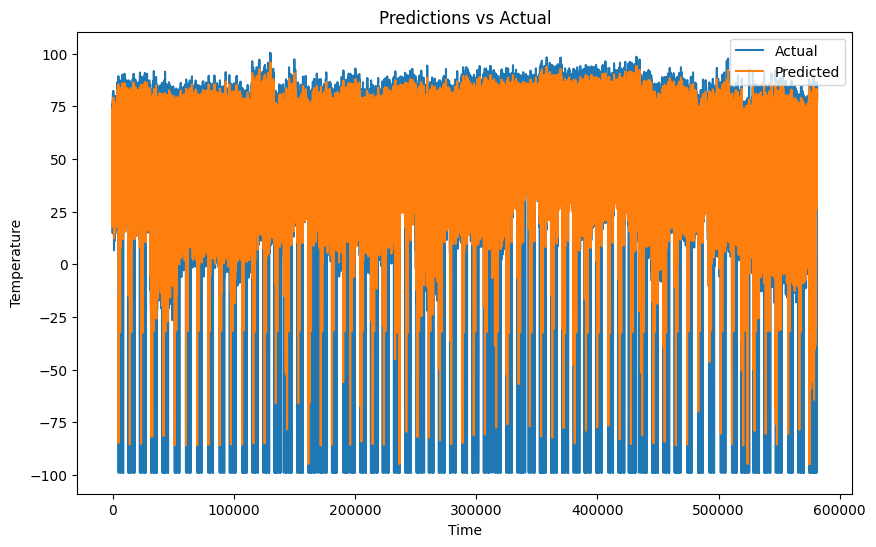

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show() 

In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 114.16644074404445
